# Titanic Data set

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## import the data set **Titanic**

In [30]:
titan = pd.read_excel("D:/bahar dönem/statistique/data/titanic3.xls")

In [31]:
titan.shape

(1309, 14)

## checked if we have nan in the data set 

In [32]:
titan.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [33]:
titan2 = titan.copy()

In [34]:
titan2 = titan2[['pclass','survived','sex','age']]

In [35]:
titan2.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


In [36]:
titan2.isnull().sum()

pclass        0
survived      0
sex           0
age         263
dtype: int64

In [37]:
titan2.dropna(axis=0,inplace=True)

In [40]:
titan2.isnull().sum()

pclass      0
survived    0
sex         0
age         0
dtype: int64

In [41]:
titan2.shape

(1046, 4)

## Create the Train and Test with the Features and Target

In [42]:
y = titan2['survived']

In [43]:
y.shape

(1046,)

In [45]:
X = titan2.drop(['survived'],axis=1)

In [46]:
X.head()

,pclass,sex,age
0,1,female,29.0000
1,1,male,0.9167
2,1,female,2.0000
3,1,male,30.0000
4,1,female,25.0000


In [47]:
X['sex'] = X['sex'].replace(['male','female'],[0,1])

In [49]:
X.head()

,pclass,sex,age
0,1,1,29.0000
1,1,0,0.9167
2,1,1,2.0000
3,1,0,30.0000
4,1,1,25.0000


## Split the data into Train and Test

In [50]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [51]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(836, 3) (836,)
(210, 3) (210,)


## Creat the model with *KNeighborsClassifier* and *GridSearchCV*

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [54]:
param_grid= {
    'n_neighbors': np.arange(1,20),
    'metric': ['euclidean','manhattan','minkowski']
}
grid = GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)

grid.fit(x_train,y_train)

C:\Users\osman\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\osman\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [55]:
grid.best_score_

0.7572497861420018

In [56]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 3}

In [57]:
model = grid.best_estimator_

## Look the quality of the model with *Confusion matrix*

In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
confusion_matrix(y_test, model.predict(x_test))

C:\Users\osman\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([[101,  20],
       [ 23,  66]], dtype=int64)

## See if the *Model* need more information to be *Performance* 

In [60]:
from sklearn.model_selection import learning_curve

In [63]:
N, train_score, val_score = learning_curve(model, x_train, y_train, train_sizes = np.linspace(0.1,1.0,10),cv=5)

C:\Users\osman\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\osman\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[ 66 133 200 267 334 400 467 534 601 668]


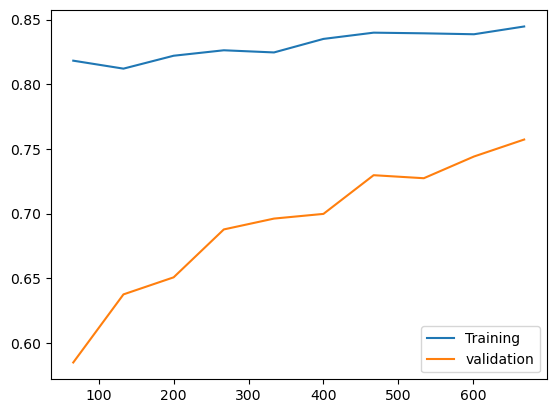

In [67]:
print(N)

plt.plot(N,train_score.mean(axis=1),label='Training')
plt.plot(N,val_score.mean(axis=1),label='validation')
plt.legend()
